### Modelling with **empymod** to design a CSEM survey for monitoring an Aquifer Thermal Energy Storage (ATES) site 

We will use the expected subsurface stratigraphy and related electrical resistivities at the ATES site of TU Delft. 

For more information on the project, have a look at https://www.push-it-thermalstorage.eu/pilots/delft/.

**Adjust the input values to empymod based on your survey setup.**

**Setup 1:** Horizontal bipole source combined with 300 m long horizontal receiver line recording horizontal electric field component.

**Setup 2:** Horizontal bipole source combined with 300 m long vertical receiver line (in borehole) recording vertical electric field component.

**Setup 3:** Vertical bipole source combined with 300 m long vertical receiver line (in borehole) recording vertical electric field component.

**Tasks:** 
- Compare layered background and target (stored water 10 °C warmer, ...,  and 50 °C warmer than base aquifer) responses for varying source locations and source lengths.
- Find optimal source location (and length?) w.r.t. receiver line for your setup. 
- Collect and compare your results with the other setups worked on by your group members.

**Questions:**
- Where would you place your source and receivers? Why?
- Which survey setup would you use to detect and monitor the hot water in the aquifer layer? Why?

In [86]:
# Uncomment on Google Colab
# %pip install empymod matplotlib ipympl ipywidgets scooby

In [87]:
import empymod

import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

plt.style.use('ggplot')

# Comment this out on Google Colab
%matplotlib widget

In [88]:
# Look at docs
# empymod.bipole?

## Layered subsurface model 
A frequency-domain setup to test different survey configurations.

**base:** layered model before hot water injection

**target:** with hot water in aquifer layer

First we define the survey parameters: source and receiver locations, and source frequencies. Choose the options for 'source' and 'receivers_1' that suit your survey setup by (un)commenting.

In [89]:
# source: x0, x1, y0, y1, z0, z1
source = [-200, -210, 0, 0, 0, 0] # x-directed bipole, dummy location
#source = [-300, -300, 0, 0, 0, 10] # z-directed bipole, dummy location

# Source frequency
frequency_1 = 1

# Receiver offsets
offsets_1 = np.linspace(1, 300, 300)

# receiver-array: x, y, z, azimuth, dip
#receivers_1 = [offsets_1, offsets_1*0, 0, 0, 0] # x-directed, Ex response
receivers_1 = [offsets_1*0, offsets_1*0, offsets_1, 0, 90] # z-directed, Ez response

Next, we define the resistivity models (base & target) and the base input. 

You can define and calculate as many target models corresponding to different aquifer temperatures, as you wish.

In [90]:
# Layer boundaries
depth = [0, 45, 80, 120, 185]

# Layer resistivities
resistivities_base = [2e14, 54.7, 38.0, 26.0, 29.5, 16.7] # base
resistivities_target = [2e14, 54.7, 38.0, 26.0, 13.1, 16.7] # target (aquifer +50 °Celsius)

# define the input that stays the same for all models
inp = {
    'src': source,
    'rec': receivers_1,
    'depth': depth,
    'freqtime': frequency_1,
    'htarg': {'pts_per_dec': -1},
    'verb': 1,
}

And finally we compute the electromagnetic responses at receiver locations:

In [91]:
resp_E_base = empymod.bipole(res=resistivities_base, **inp)
resp_E_target = empymod.bipole(res=resistivities_target, **inp)

Let’s plot the resulting responses in terms of amplitudes and phases and their differences:

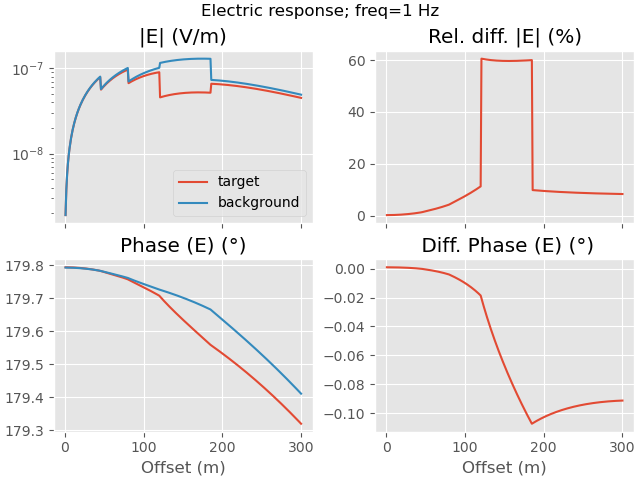

In [92]:
fig1, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, constrained_layout=True)

fig1.suptitle(f'Electric response; freq={frequency_1} Hz')

ax11.set_title('|E| (V/m)')
ax11.semilogy(offsets_1, resp_E_target.amp(), label='target')
ax11.semilogy(offsets_1, resp_E_base.amp(), label='background')
ax11.legend()

ax12.set_title('Rel. diff. |E| (%)')
rel_diff_amp = 100 * (abs(resp_E_target.amp()-resp_E_base.amp()) / abs(resp_E_base.amp()))
ax12.plot(offsets_1, rel_diff_amp)

ax13.set_title('Phase (E) (°)')
ax13.plot(offsets_1, resp_E_target.pha(deg=True))
ax13.plot(offsets_1, resp_E_base.pha(deg=True))

ax14.set_title(' Diff. Phase (E) (°)')
ax14.plot(offsets_1, resp_E_target.pha(deg=True) - resp_E_base.pha(deg=True))

for ax in [ax13, ax14]:
    ax.set_xlabel('Offset (m)')
    # ax.set_xlabel('Depth (m)') # for plotting Ez in borehole

**Optional tasks:**
- Plot the resistivity profile of your background and target model.
- Compare different frequencies.
- Plot the results on a color-coded section for different source offsets.
- Come up with your own survey layout idea.